In [1]:
#import libraries
import numpy as np
import matplotlib
from matplotlib import pyplot as plt 
import random
import pickle as pkls

#local files being imported
import platform_opt
from players import *
import sims
#Note: when indexed as a list: group $A$ is 0, group $B$ is 1.
#      when indexed as a dict: group $A$ is -1, group $B$ is 1.

In [2]:
# SIMULATION PARAMETERS AGNOSTIC TO DATA
T = 12                 # max number of timesteps
M = 100000            # size of unit mass

In [3]:
pi,beta_dist,P,v,c,q = sims.get_params('facebook')

#theta_hat and theta_tilde learned with T = 15, epsilon = 0.05
#since the optimization in the following cell only needs to be run once per set of parameters
#theta_hat = {1: 1.0, -1: 0.0}
#theta_tilde = {1: 0.9999999999599892, -1: 4.3500351052646725e-11}

#T = 12, epsilon = 0.0025
theta_hat = {1: 1.0, -1: 0.019660630150250945}
theta_tilde = {1: 0.9999999999586818, -1: 4.416501589446678e-11}

#T = 12, epsilon = 1e-10
theta_hat = {1: 1.0, -1: 0.02258105621028791}
theta_tilde = {1: 0.9999999999586818, -1: 4.416501589446678e-11}

In [8]:
#how to show articles at timestep 1
epsilon = 1e-10
    
theta_hat = platform_opt.opt(pi, q, T, epsilon,c,v,beta_dist) #constrained with exposure equality
theta_tilde = platform_opt.opt_unconstrained(pi, q, T, epsilon,c,v,beta_dist) #unconstrained to optimize clicks

print(theta_hat)
print(theta_tilde)

{1: 1.0, -1: 0.02258105621028791}
{1: 0.9999999999586818, -1: 4.416501589446678e-11}


In [7]:
#AS IS THIS ONLY WORKS FOR ONE ARTICLE, OUT OF DATE.
# understanding equal exposure, and clicks, and shares
# indexed by article
exposure_fair = {1 : shown_d_fair[(1,1)] +  shown_d_fair[(1,-1)], 
                 -1 :  shown_d_fair[(-1,1)] +  shown_d_fair[(-1,-1)]}#indexed by article 
clicks_fair =   {1 : click_d_fair[(1,1)] +  click_d_fair[(1,-1)], 
                 -1 :  click_d_fair[(-1,1)] +  click_d_fair[(-1,-1)]}#indexed by article 
share_fair =   {1 : share_d_fair[(1,1)] +  share_d_fair[(1,-1)], 
                 -1 :  share_d_fair[(-1,1)] +  share_d_fair[(-1,-1)]}#indexed by article 


exposure_opt = {1 : shown_d_opt[(1,1)] +  shown_d_opt[(1,-1)], 
                 -1 :  shown_d_opt[(-1,1)] +  shown_d_opt[(-1,-1)]}#indexed by article 
clicks_opt =   {1 : click_d_opt[(1,1)] +  click_d_opt[(1,-1)], 
                 -1 :  click_d_opt[(-1,1)] +  click_d_opt[(-1,-1)]}#indexed by article 
share_opt =   {1 : share_d_opt[(1,1)] +  share_d_opt[(1,-1)], 
                 -1 :  share_d_opt[(-1,1)] +  share_d_opt[(-1,-1)]}#indexed by article 


print(exposure_fair[1] / (pi[1] * M))
print(exposure_fair[-1] / (pi[-1]* M))

print(exposure_opt[1] /(pi[1] * M))
print(exposure_opt[-1] /(pi[-1] * M))

NameError: name 'shown_d_fair' is not defined

In [ ]:
#ONLY DEFINED WITH ABOVE DICTS
#considers article fairness, in the sense this allows us to look at rates at which articles are shown/clicked/shared according to 
#however, thoughts on having this over time or total number of clicks are fine?
# here, the lower the better: means the exposure/clicks/shares are about equal

#print(exposure_fair)
#print(exposure_opt)
print('Article exposure difference: fair' + str(np.abs(exposure_fair[1] - exposure_fair[-1])))
print('Article exposure difference: opt' + str(np.abs(exposure_opt[1] - exposure_opt[-1])))
print('\n')
#print(share_fair)
#print(share_opt)
print('Article shares difference: fair' + str(np.abs(share_fair[1] - share_fair[-1])))
print('Article shares difference: opt' + str(np.abs(share_opt[1] - share_opt[-1])))

In [10]:
#run the experiments multiple times for paper results
num_trials = 100

players_list_fair = []
shown_fair = []
click_fair = []
share_fair = []
pof_fair = []

players_list_opt = []
shown_opt = []
click_opt = []
share_opt = []
pof_opt = []


for i in range(num_trials):
    players_in_model_fair, shown_d_fair, click_d_fair, share_d_fair = sims.runModel(theta_hat, T, pi, M, P, beta_dist, v,c,q)
    players_in_model_opt, shown_d_opt, click_d_opt, share_d_opt = sims.runModel(theta_tilde, T, pi, M, P, beta_dist, v,c,q)
    
    players_list_fair.append(players_in_model_fair + ([0] * (T - len(players_in_model_fair))))
    shown_fair.append(shown_d_fair)
    click_fair.append(click_d_fair)
    share_fair.append(share_d_fair)
    pof_fair.append(sum(players_in_model_fair[1:]))
    
    players_list_opt.append(players_in_model_opt + ([0] * (T - len(players_in_model_opt))))
    shown_opt.append(shown_d_opt)
    click_opt.append(click_d_opt)
    share_opt.append(share_d_opt)
    pof_opt.append(sum(players_in_model_opt[1:]))
    
    
sims.saveRuns(players_list_fair, 'simulation_data/players_list_fair.pkl')
sims.saveRuns(shown_fair, 'simulation_data/shown_fair.pkl')
sims.saveRuns(click_fair, 'simulation_data/click_fair.pkl')
sims.saveRuns(share_fair, 'simulation_data/share_fair.pkl')
sims.saveRuns(pof_fair, 'simulation_data/pof_fair.pkl')

sims.saveRuns(players_list_opt, 'simulation_data/players_list_opt.pkl')
sims.saveRuns(shown_opt, 'simulation_data/shown_opt.pkl')
sims.saveRuns(click_opt, 'simulation_data/click_opt.pkl')
sims.saveRuns(share_opt, 'simulation_data/share_opt.pkl')
sims.saveRuns(pof_opt, 'simulation_data/pof_opt.pkl')



In [11]:
#average intergroup exposure and share
#normalized by number of impressions/clicks in model
print("Intergroup exposure and shares subject to fairness constraints")
show_avg_mp_fair = np.mean([x[(-1,1)] for x in shown_fair])
show_avg_pm_fair = np.mean([x[(1,-1)] for x in shown_fair])
print((show_avg_mp_fair + show_avg_pm_fair) / np.mean(players_in_model_fair))

share_avg_mp_fair = np.mean([x[(-1,1)] for x in share_fair])
share_avg_pm_fair = np.mean([x[(1,-1)] for x in share_fair])
denom_fair = [x[1:] for x in players_list_fair]
print((share_avg_mp_fair + share_avg_pm_fair) / np.mean(denom_fair)) 

print("Intergroup exposure and shares unconstrained")
show_avg_mp_opt = np.mean([x[(-1,1)] for x in shown_opt])
show_avg_pm_opt = np.mean([x[(1,-1)] for x in shown_opt])
print((show_avg_mp_opt + show_avg_pm_opt) / np.mean(players_in_model_opt))

share_avg_mp_opt = np.mean([x[(-1,1)] for x in share_opt])
share_avg_pm_opt = np.mean([x[(1,-1)] for x in share_opt])
denom_opt = [x[1:] for x in players_list_opt]
print((share_avg_mp_opt + share_avg_pm_opt) / np.mean(denom_opt))

Intergroup exposure and shares subject to fairness constraints
1.1976077787873447
0.17582061201325028
Intergroup exposure and shares unconstrained
1.3836892916091217
0.17594147143171018


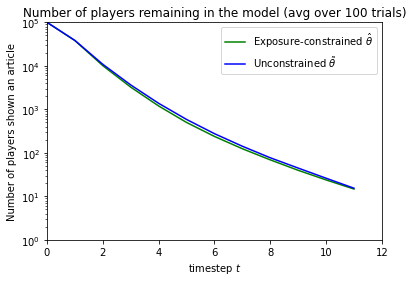

In [12]:
plt.plot(np.mean(players_list_fair, axis=0), color='green')
plt.plot(np.mean(players_list_opt, axis=0), color='blue')
plt.title("Number of players remaining in the model (avg over %i trials)" % (num_trials))
plt.ylabel("Number of players shown an article")
plt.xlabel("timestep $t$")
plt.yscale('log')
plt.xlim((0,T))
plt.ylim((1, M))
plt.legend(('Exposure-constrained $\hat \\theta$', 'Unconstrained $\\tilde \\theta$'))
plt.show()

NameError: name 'exposure_fair' is not defined

[None, None, None, None]

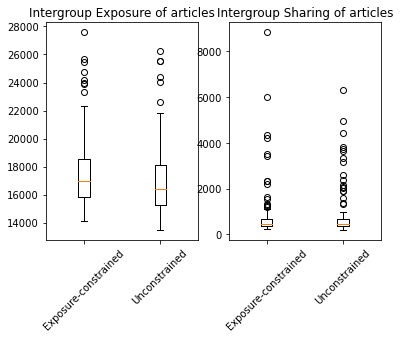

In [13]:
#calculate boxplot data
intergroup_fair_shown = [x[(-1,1)] + x[(1,-1)] for x in shown_fair]
intergroup_fair_share = [x[(-1,1)] + x[(1,-1)] for x in share_fair]

intergroup_opt_shown = [x[(-1,1)] + x[(1,-1)] for x in shown_opt]
intergroup_opt_share = [x[(-1,1)] + x[(1,-1)] for x in share_opt]

# plot data
fig1, (ax1, ax2) = plt.subplots(1,2)

ax1.set_title('Intergroup Exposure of articles')
ax1.boxplot([intergroup_fair_shown, intergroup_opt_shown], labels=['Exposure-constrained', 'Unconstrained'])

ax2.set_title('Intergroup Sharing of articles')
ax2.boxplot([intergroup_fair_share, intergroup_opt_share], labels=['Exposure-constrained', 'Unconstrained'])

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

[None, None, None, None]

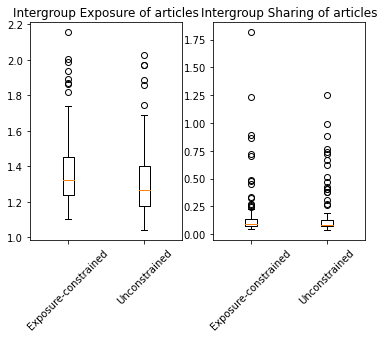

In [14]:
#calculate boxplot data, normalized by exposure size
intergroup_fair_shown = [(x[(-1,1)] + x[(1,-1)]) / np.mean(players_list_fair) for x in shown_fair]
intergroup_fair_share = [(x[(-1,1)] + x[(1,-1)]) / np.mean(denom_fair) for x in share_fair]

intergroup_opt_shown = [(x[(-1,1)] + x[(1,-1)]) / np.mean(players_list_opt) for x in shown_opt]
intergroup_opt_share = [(x[(-1,1)] + x[(1,-1)]) / np.mean(denom_opt) for x in share_opt]

# plot data
fig1, (ax1, ax2) = plt.subplots(1,2)

ax1.set_title('Intergroup Exposure of articles')
ax1.boxplot([intergroup_fair_shown, intergroup_opt_shown], labels=['Exposure-constrained', 'Unconstrained'])

ax2.set_title('Intergroup Sharing of articles')
ax2.boxplot([intergroup_fair_share, intergroup_opt_share], labels=['Exposure-constrained', 'Unconstrained'])

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

1.0578551394247402


{'whiskers': [<matplotlib.lines.Line2D at 0x2980dd14940>,
 'caps': [<matplotlib.lines.Line2D at 0x2980dd1e040>,
 'boxes': [<matplotlib.lines.Line2D at 0x2980dd145e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2980dd1e700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2980dd1ea00>],
 'means': []}

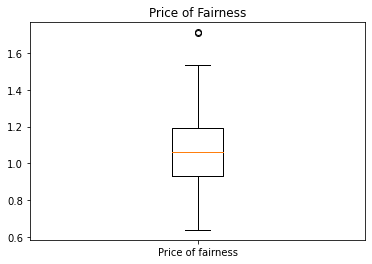

In [15]:
#boxplot for price of fairness
pof = [pof_opt[i] / pof_fair[i] for i in range(len(pof_opt))]
print(np.mean(pof))

fig1, ax1 = plt.subplots()

ax1.set_title('Price of Fairness')
ax1.boxplot(pof, labels=['Price of fairness'])